In [1]:
!git clone https://github.com/chinge55/nepali-numbers

Cloning into 'nepali-numbers'...
remote: Enumerating objects: 344, done.
remote: Counting objects: 100% (344/344), done.
remote: Compressing objects: 100% (338/338), done.
remote: Total 344 (delta 7), reused 343 (delta 6), pack-reused 0
Receiving objects: 100% (344/344), 39.43 MiB | 10.26 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
!ls

nepali-numbers	sample_data


In [0]:
import os
import numpy as np
path = 'nepali-numbers/data'
import librosa
samples, sample_rate = librosa.load(path+'/eight-2018-05-30T11_28_25.746Z.wav', sr = 16000, duration = 1.0)

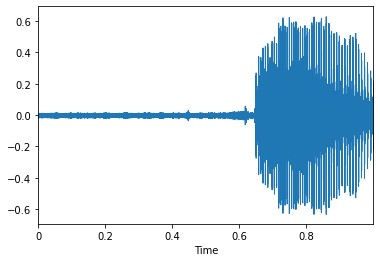

In [4]:
import matplotlib.pyplot as plt
import librosa.display
librosa.display.waveplot(samples, sr=sample_rate)


In [5]:
import IPython.display as ipd
ipd.Audio(samples, rate=sample_rate)

In [0]:
#find count of each label and plot bar graph
label = ["zero","one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

In [7]:
import numpy as np
all_wave = []
all_label = []
no_of_recordings = {label[i]:0 for i in range(len(label))}
for item in os.listdir(path):
  for lb in label:
    if item.startswith(lb):
      samples, sample_rate = librosa.load(path + '/' +item, sr = 16000, duration = 1.0)
      samples = librosa.resample(samples, sample_rate, 8000)
      if(len(samples)== 8000) :
        all_wave.append(samples)
        all_label.append(lb)
        no_of_recordings[lb] = no_of_recordings[lb] + 1
      else:
        samples = np.pad(samples, (0,8000-len(samples)), mode = 'median')
        all_wave.append(samples)
        all_label.append(lb)
        no_of_recordings[lb] = no_of_recordings[lb] + 1

print(no_of_recordings) 

{'zero': 38, 'one': 37, 'two': 31, 'three': 34, 'four': 32, 'five': 32, 'six': 31, 'seven': 31, 'eight': 31, 'nine': 33}


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(all_label)
classes= list(le.classes_)
print(all_label)
print(classes)
print(y)

['zero', 'eight', 'two', 'three', 'five', 'one', 'zero', 'four', 'six', 'two', 'three', 'six', 'three', 'zero', 'two', 'eight', 'zero', 'eight', 'zero', 'seven', 'zero', 'zero', 'zero', 'nine', 'one', 'zero', 'seven', 'six', 'zero', 'seven', 'nine', 'zero', 'seven', 'four', 'one', 'eight', 'six', 'five', 'five', 'six', 'nine', 'nine', 'zero', 'four', 'eight', 'four', 'two', 'zero', 'three', 'three', 'four', 'five', 'one', 'five', 'two', 'three', 'zero', 'one', 'five', 'nine', 'zero', 'five', 'two', 'three', 'six', 'six', 'three', 'seven', 'four', 'four', 'six', 'eight', 'eight', 'zero', 'seven', 'nine', 'four', 'two', 'four', 'zero', 'five', 'one', 'zero', 'zero', 'five', 'nine', 'four', 'four', 'five', 'five', 'nine', 'zero', 'seven', 'eight', 'one', 'two', 'six', 'seven', 'five', 'three', 'eight', 'one', 'one', 'nine', 'three', 'three', 'four', 'eight', 'six', 'four', 'three', 'eight', 'four', 'nine', 'two', 'one', 'zero', 'zero', 'five', 'four', 'one', 'three', 'five', 'seven', 'nin

In [12]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(label))
print(y)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [13]:
all_wave = np.array(all_wave).reshape(-1,8000,1)
print(all_wave.shape)
print(y.shape)
print(np.array(all_label).shape)

(330, 8000, 1)
(330, 10)
(330,)


In [0]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y))

In [15]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras import models, layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()
inputs = Input(shape=(8000,1))
model = models.Sequential()
model.add(layers.Conv1D(8, 13, padding = 'valid', activation = 'relu', input_shape =(8000,1)))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21296)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2129700   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 2,130,822
Trainable params: 2,130,822
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [18]:
history=model.fit(x_tr, y_tr ,epochs=10, callbacks=[es,mc], batch_size=10, validation_data=(x_val,y_val))

Train on 247 samples, validate on 83 samples
Epoch 1/10
247/247 [==============================] - 6s 25ms/step - loss: 2.3861 - accuracy: 0.1134 - val_loss: 2.3670 - val_accuracy: 0.1325
Epoch 2/10
190/247 [======================>.......] - ETA: 0s - loss: 1.9934 - accuracy: 0.4316

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


247/247 [==============================] - 0s 1ms/step - loss: 1.9986 - accuracy: 0.4089 - val_loss: 2.4448 - val_accuracy: 0.1566
Epoch 3/10
247/247 [==============================] - 0s 1ms/step - loss: 1.5909 - accuracy: 0.5830 - val_loss: 2.5186 - val_accuracy: 0.1928
Epoch 4/10
247/247 [==============================] - 0s 1ms/step - loss: 1.1242 - accuracy: 0.7449 - val_loss: 2.5170 - val_accuracy: 0.2048
Epoch 5/10
247/247 [==============================] - 0s 1ms/step - loss: 0.7214 - accuracy: 0.8947 - val_loss: 2.7916 - val_accuracy: 0.2048
Epoch 6/10
247/247 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.9150 - val_loss: 2.9162 - val_accuracy: 0.2530
Epoch 7/10
247/247 [==============================] - 0s 1ms/step - loss: 0.3017 - accuracy: 0.9595 - val_loss: 3.2741 - val_accuracy: 0.2169
Epoch 8/10
247/247 [==============================] - 0s 1ms/step - loss: 0.1970 - accuracy: 0.9798 - val_loss: 3.5806 - val_accuracy: 0.1928
Epoch 9/10
247/24

In [0]:
#Clearly, the model is overfittting .. or maybe some other problems